# Natural Language Processing Project

In this NLP project you will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

Let's get started!

## Imports
 **Import the usual suspects. :) **

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## The Data

**Read the yelp.csv file and set it as a dataframe called yelp.**

In [2]:
df=pd.read_csv(r"C:\Users\geono\OneDrive\Έγγραφα\PythonLesson\Py-DS-ML-Bootcamp-master\Refactored_Py_DS_ML_Bootcamp-master\20-Natural-Language-Processing\yelp.csv")

** Check the head, info , and describe methods on yelp.**

In [3]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Create a new column called "text length" which is the number of words in the text column.**

In [6]:
df['text_length']=df['text'].apply(len)

In [7]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


# EDA

Let's explore the data

## Imports

**Import the data visualization libraries.**

<Axes: xlabel='text_length', ylabel='Count'>

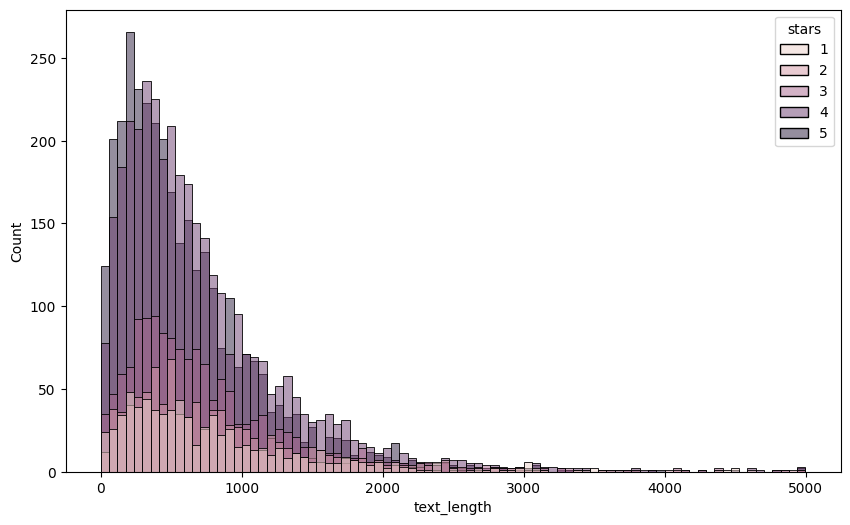

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(x='text_length',data=df,hue='stars')

**Create a grid of 5 histograms of text length based off of the star ratings.**

Text(0.5, 1.0, '5 Star')

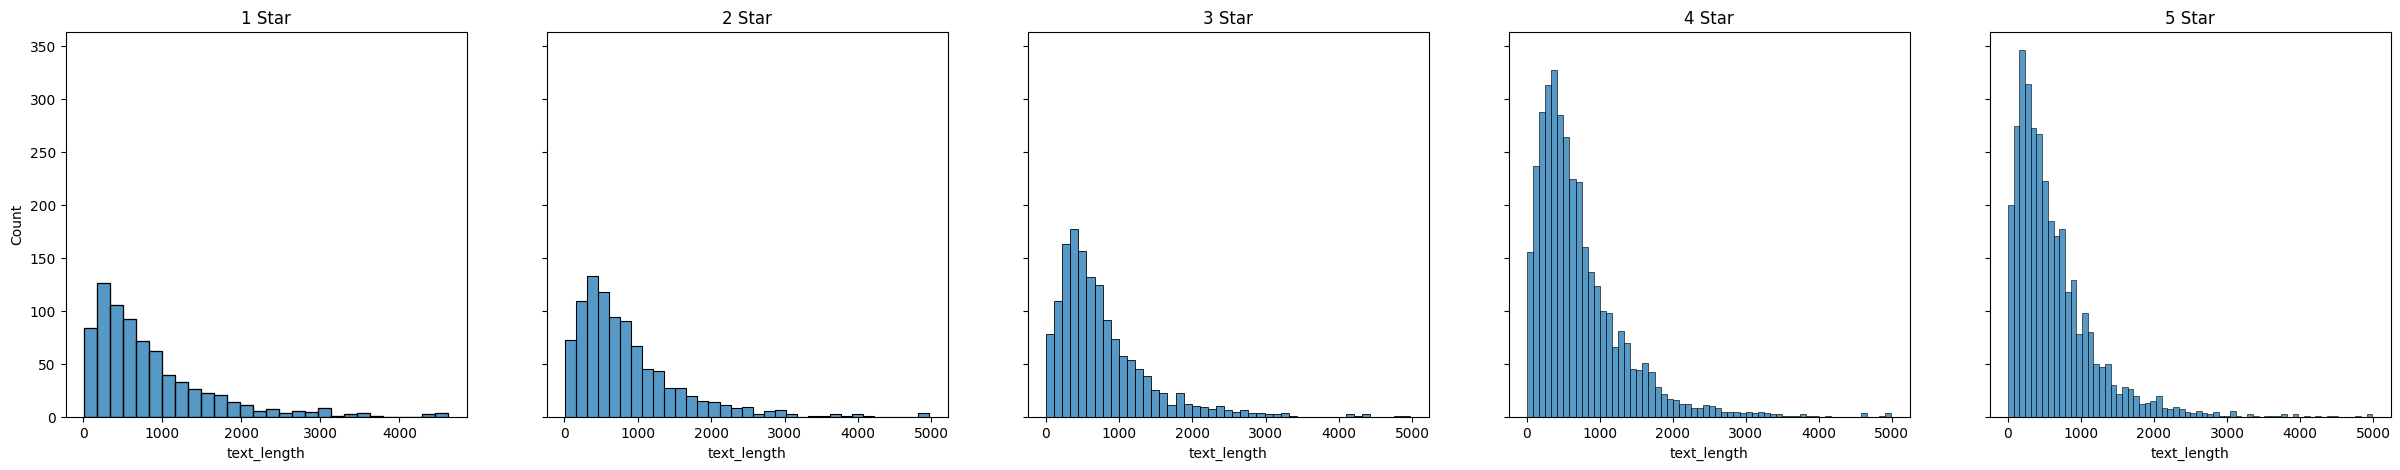

In [9]:
f,axes=plt.subplots(1,5,figsize=(30,5),sharey=True)
sns.histplot(x=df['text_length'][df['stars']==1], ax=axes[0])
axes[0].set_title('1 Star')
sns.histplot(x=df['text_length'][df['stars']==2], ax=axes[1])
axes[1].set_title('2 Star')
sns.histplot(x=df['text_length'][df['stars']==3], ax=axes[2])
axes[2].set_title('3 Star')
sns.histplot(x=df['text_length'][df['stars']==4], ax=axes[3])
axes[3].set_title('4 Star')
sns.histplot(x=df['text_length'][df['stars']==5], ax=axes[4])
axes[4].set_title('5 Star')


**Create a boxplot of text length for each star category.**

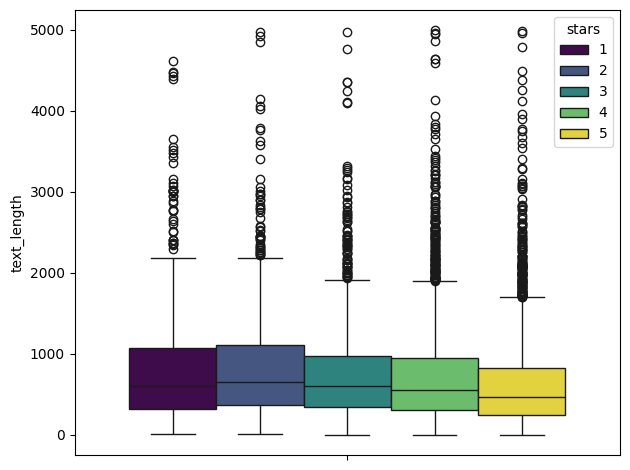

In [10]:
sns.boxplot(y=df['text_length'],hue=df['stars'],palette='viridis')
plt.tight_layout()

**Create a countplot of the number of occurrences for each type of star rating.**

C:\Users\geono\AppData\Local\Temp\ipykernel_676\864313070.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stars',data=df,palette='viridis')


Text(0, 0.5, 'Count')

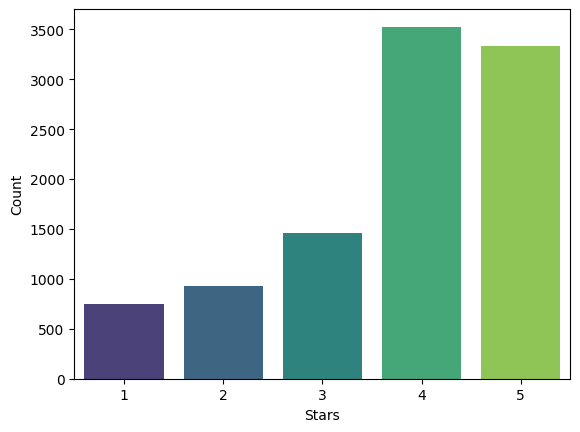

In [11]:
sns.countplot(x='stars',data=df,palette='viridis')
plt.xlabel('Stars')
plt.ylabel('Count')


In [12]:
df.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny', 'text_length'],
      dtype='object')

** Use groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:**

In [13]:
df[['stars','cool', 'useful', 'funny', 'text_length']].groupby('stars').mean()

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


**Use the corr() method on that groupby dataframe to produce this dataframe:**

In [14]:
df[['stars','cool', 'useful', 'funny', 'text_length']].groupby('stars').mean().corr()

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_length,-0.857664,0.699881,0.843461,1.000000


**Then use seaborn to create a heatmap based off that .corr() dataframe:**

<Axes: >

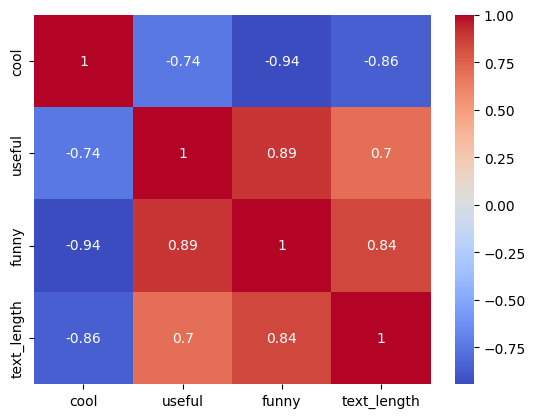

In [15]:
sns.heatmap(df[['stars','cool', 'useful', 'funny', 'text_length']].groupby('stars').mean().corr(),cmap='coolwarm',annot=True)

## NLP Classification Task


**Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [16]:
yelp_class=df[(df['stars']==1) | (df['stars']==5)]


In [17]:
yelp_class.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


In [18]:
yelp_class.groupby('stars').describe()

cool                                                useful            \
        count      mean       std  min  25%  50%  75%   max   count      mean   
stars                                                                           
1       749.0  0.576769  1.474759  0.0  0.0  0.0  1.0  17.0   749.0  1.604806   
5      3337.0  0.944261  2.484583  0.0  0.0  0.0  1.0  77.0  3337.0  1.381780   

       ... funny       text_length                                       \
       ...   75%   max       count        mean         std   min    25%   
stars  ...                                                                
1      ...   1.0  30.0       749.0  826.515354  742.929304  11.0  315.0   
5      ...   1.0  39.0      3337.0  624.999101  558.578229   6.0  243.0   

                              
         50%     75%     max  
stars                         
1      600.0  1075.0  4618.0  
5      471.0   826.0  4986.0  

[2 rows x 32 columns]

** Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. **

In [19]:
X=yelp_class['text']
y=yelp_class['stars']

**Import CountVectorizer and create a CountVectorizer object.**

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

** Use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column).**

In [21]:
X=cv.fit_transform(X)

## Train Test Split

Let's split our data into training and testing data.


In [22]:
from sklearn.model_selection import train_test_split


In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

## Training a Model

Time to train a model!

** Import MultinomialNB and create an instance of the estimator. **

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
nb=MultinomialNB()

**Now fit nb using the training data.**

In [26]:
nb.fit(X_train,y_train)

MultinomialNB()

## Predictions and Evaluations

Time to see how our model did!


In [27]:
predictions=nb.predict(X_test)

** Create a confusion matrix and classification report using these predictions and y_test **

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



In [30]:
print(confusion_matrix(y_test,predictions))

[[159  69]
 [ 22 976]]


**Great! Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

# Using Text Processing

** Import TfidfTransformer from sklearn. **

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer

** Import Pipeline from sklearn. **

In [32]:
from sklearn.pipeline import Pipeline

** Now i create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [33]:
pipline=Pipeline([('cv',CountVectorizer()),('tfidf',TfidfTransformer()),('nb',MultinomialNB())])

## Using the Pipeline


### Train Test Split

**Redo the train test split on the yelp_class object.**

In [34]:
X_train,X_test,y_train,y_test=train_test_split(yelp_class['text'],y,test_size=0.3,random_state=101)

**Now fit the pipeline to the training data.**

In [35]:
pipline.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('nb', MultinomialNB())])

### Predictions and Evaluation

** Now use the pipeline to predict from the X_test and create a classification report and confusion matrix.**

In [36]:
pred_pipe=pipline.predict(X_test)

In [37]:
print(confusion_matrix(y_test,pred_pipe))

[[  0 228]
 [  0 998]]


In [38]:
print(classification_report(y_test,pred_pipe))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



c:\Users\geono\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\geono\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\geono\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Looks like Tf-Idf actually made things worse!

Lets change the analyzer. We will make a custom one.

In [39]:
yelp_class.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


In [40]:
texts=yelp_class['text']

In [41]:
import string
from nltk.corpus import stopwords

In [42]:
def text_man(message):
    nopunc=[c for c in message if c not in string.punctuation]
    nopunc=''.join(nopunc)
    clean_text=[c for c in nopunc.split() if c.lower() not in stopwords.words('english')]
    return clean_text

In [49]:
pipline=Pipeline([('cv',CountVectorizer(analyzer=text_man)),('nb',MultinomialNB())])

In [50]:
pipline.fit(X_train,y_train)

Pipeline(steps=[('cv',
                 CountVectorizer(analyzer=<function text_man at 0x000001D3848037E0>)),
                ('nb', MultinomialNB())])

In [51]:
new_pred=pipline.predict(X_test)

In [52]:
print(confusion_matrix(y_test,new_pred))

[[143  85]
 [ 11 987]]


In [53]:
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

           1       0.93      0.63      0.75       228
           5       0.92      0.99      0.95       998

    accuracy                           0.92      1226
   macro avg       0.92      0.81      0.85      1226
weighted avg       0.92      0.92      0.92      1226



In [54]:
from sklearn.svm import LinearSVC

In [55]:
pipline3=Pipeline([('cv',CountVectorizer(analyzer=text_man)),('nb',LinearSVC())])

In [56]:
pipline3.fit(X_train,y_train)

c:\Users\geono\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('cv',
                 CountVectorizer(analyzer=<function text_man at 0x000001D3848037E0>)),
                ('nb', LinearSVC())])

In [57]:
pip3_pred=pipline3.predict(X_test)

In [58]:
print(classification_report(y_test,pip3_pred))

              precision    recall  f1-score   support

           1       0.80      0.73      0.76       228
           5       0.94      0.96      0.95       998

    accuracy                           0.92      1226
   macro avg       0.87      0.84      0.86      1226
weighted avg       0.91      0.92      0.91      1226

